In [525]:
# costMatrix = [[0,9,14,23,32,50,21,49,30,27,35,28,18],   
# [9,0,21,22,36,52,24,51,36,37,41,30,20],    
# [14,21,0,25,38,5,31,7,36,43,29,7,6],    
# [23,22,25,0,42,12,35,17,44,31,31,11,6],
# [32,36,38,42,0,22,37,16,46,37,29,13,14],   
# [50,52,5,12,22,0,41,23,10,39,9,17,16],   
# [21,24,31,35,37,41,0,26,21,19,10,25,12],  
# [49,51,7,17,16,23,26,0,30,28,16,27,12],   
# [30,36,36,44,46,10,21,30,0,25,22,10,20],    
# [27,37,43,31,37,39,19,28,25,0,20,16,8],   
# [35,41,29,31,29,9,10,16,22,20,0,10,10],   
# [28,30,7,11,13,17,25,27,10,16,10,0,10],
# [18,20, 6, 6,14,16,12,12,20,8, 10,10,0]]

# len(costMatrix)

def read_vrpspd_file(file_path):
    with open(file_path, "r") as f:
        lines = [line.strip() for line in f.readlines() if line.strip() and "~" not in line]

    cost_matrix = []
    delivery = []
    pickup = []
    vehicle_capacities = []

    i = 0

    # 1. Read cost matrix
    if "Cost matrix" in lines[i]:
        i += 1

    # đọc từng dòng số -> ma trận
    while i < len(lines) and "Delivery quantities" not in lines[i]:
        row = list(map(float, lines[i].split()))
        cost_matrix.append(row)
        i += 1

    # 2. Read delivery
    if "Delivery quantities" in lines[i]:
        i += 1

    delivery = list(map(int, map(float, lines[i].split())))
    i += 1

    # 3. Read pickup
    if "Pick-up quantities" in lines[i]:
        i += 1

    pickup = list(map(int, map(float, lines[i].split())))
    i += 1

    # 4. Read vehicle capacity (LIST of capacities)
    if "Vehicle capacity" in lines[i]:
        i += 1
        vehicle_capacities = list(map(int, lines[i].split()))
        i += 1

    # === ADD DEPOT ===
    delivery = [0] + delivery
    pickup = [0] + pickup

    # === FINAL VARIABLES ===
    numberOfVehicles = len(vehicle_capacities)

    # if all vehicles have same capacity -> use that as capacityOfVehicle
    if len(set(vehicle_capacities)) == 1:
        capacityOfVehicle = vehicle_capacities[0]
    else:
        # different capacity vehicles
        capacityOfVehicle = max(vehicle_capacities)

    return cost_matrix, delivery, pickup, vehicle_capacities, capacityOfVehicle, numberOfVehicles


# ===== USAGE =====
file_path = "D:\\VRP\\VRPSPD\\class4\\C101_20_02.txt"   # <- thay đường dẫn file thật của bạn
costMatrix, demand, pickup, vehicle_caps, capacityOfVehicle, numberOfVehicles = read_vrpspd_file(file_path)

print("\n✅ costMatrix =", costMatrix)
print("\n✅ demand =", demand)
print("\n✅ pickup =", pickup)
print("\n✅ vehicle_capacities =", vehicle_caps)
print("✅ capacityOfVehicle =", capacityOfVehicle)
print("✅ numberOfVehicles =", numberOfVehicles)



✅ costMatrix = [[0.0, 19.0, 21.0, 17.0, 19.0, 16.0, 19.0, 16.0, 19.0, 21.0, 17.0, 20.0, 39.0, 31.0, 40.0, 37.0, 41.0, 34.0, 36.0, 40.0, 10.0], [19.0, 0.0, 2.0, 4.0, 3.0, 5.0, 6.0, 6.0, 7.0, 8.0, 11.0, 11.0, 27.0, 25.0, 29.0, 28.0, 31.0, 28.0, 31.0, 33.0, 24.0], [21.0, 2.0, 0.0, 5.0, 4.0, 6.0, 6.0, 7.0, 8.0, 7.0, 11.0, 11.0, 25.0, 24.0, 28.0, 27.0, 30.0, 28.0, 31.0, 32.0, 25.0], [17.0, 4.0, 5.0, 0.0, 2.0, 1.0, 4.0, 2.0, 5.0, 6.0, 7.0, 8.0, 26.0, 22.0, 28.0, 27.0, 30.0, 26.0, 29.0, 31.0, 20.0], [19.0, 3.0, 4.0, 2.0, 0.0, 3.0, 3.0, 3.0, 4.0, 5.0, 8.0, 8.0, 25.0, 22.0, 27.0, 26.0, 28.0, 25.0, 28.0, 30.0, 22.0], [16.0, 5.0, 6.0, 1.0, 3.0, 0.0, 5.0, 3.0, 5.0, 7.0, 8.0, 9.0, 27.0, 23.0, 29.0, 27.0, 30.0, 26.0, 29.0, 31.0, 20.0], [19.0, 6.0, 6.0, 4.0, 3.0, 5.0, 0.0, 3.0, 3.0, 3.0, 6.0, 5.0, 22.0, 19.0, 25.0, 23.0, 26.0, 23.0, 26.0, 28.0, 22.0], [16.0, 6.0, 7.0, 2.0, 3.0, 3.0, 3.0, 0.0, 3.0, 5.0, 5.0, 6.0, 25.0, 21.0, 27.0, 25.0, 28.0, 24.0, 27.0, 29.0, 19.0], [19.0, 7.0, 8.0, 5.0, 4.0, 5.0, 3

In [526]:
# Clarke-Wright Savings Heuristic for Vehicle Routing Problem with Simultaneous Pickup and Delivery (VRPSPD)
# Savings-based VRPSPD (Gajpal & Abad style)
from scipy.spatial import distance
import numpy as np

# xCoordinates = [162, 218, 218, 201, 214, 224, 210, 104, 126, 119, 129, 126, 125, 116, 126, 125, 119, 115, 153, 175, 180, 159, 188, 152, 215, 212, 188, 207, 184, 207]
# yCoordinates = [354, 382, 358, 370, 371, 370, 382, 354, 338, 340, 349, 347, 346, 355, 335, 355, 357, 341, 351, 363, 360, 331, 357, 349, 389, 394, 393, 406, 410, 392]

# costMatrix = np.ndarray(shape=(len(xCoordinates), len(yCoordinates)))
# for i in range(len(xCoordinates)):
#     for j in range(len(yCoordinates)):
#         costMatrix[i][j] = float(distance.euclidean([xCoordinates[i],yCoordinates[i]], [xCoordinates[j],yCoordinates[j]]))

# demand = [0, 300, 3100, 125, 100, 200, 150, 150, 450, 300, 100, 950, 125, 150, 150, 550, 150, 100, 150, 400, 300, 1500, 100, 300, 500, 800, 300, 100, 150, 1000]
# pickup = [1000, 0, 300, 3100, 125, 100, 200, 150, 150, 450, 300, 100, 950, 125, 150, 150, 550, 150, 100, 150, 400, 300, 1500, 100, 300, 500, 800, 300, 100, 150]
# capacityOfVehicle = 4500
# numberOfVehicles = 4

# costMatrix = [[0,9,14,23,32,50,21,49,30,27,35,28,18],   
# [9,0,21,22,36,52,24,51,36,37,41,30,20],    
# [14,21,0,25,38,5,31,7,36,43,29,7,6],    
# [23,22,25,0,42,12,35,17,44,31,31,11,6],
# [32,36,38,42,0,22,37,16,46,37,29,13,14],   
# [50,52,5,12,22,0,41,23,10,39,9,17,16],   
# [21,24,31,35,37,41,0,26,21,19,10,25,12],  
# [49,51,7,17,16,23,26,0,30,28,16,27,12],   
# [30,36,36,44,46,10,21,30,0,25,22,10,20],    
# [27,37,43,31,37,39,19,28,25,0,20,16,8],   
# [35,41,29,31,29,9,10,16,22,20,0,10,10],   
# [28,30,7,11,13,17,25,27,10,16,10,0,10],
# [18,20, 6, 6,14,16,12,12,20,8, 10,10,0]]

# demand = [0, 1200, 1700, 1500, 1400, 1700, 1400, 1200, 1900, 1800, 1600, 1700, 1100] 
# pickup = [0, 0, 1200, 1700, 1500, 1400, 1700, 1400, 1200, 1900, 1800, 1600, 1700]
# capacityOfVehicle = 6000
# numberOfVehicles = 4

# E-n22-k4.vrp = CE22P

# xCoordinates = [145, 151, 159, 130, 128, 163, 146, 161, 142, 163, 148, 128, 156, 129, 146, 164, 141, 147, 164, 129, 155, 139]
# yCoordinates = [215, 164, 261, 254, 252, 247, 246, 242, 239, 236, 232, 231, 217, 214, 208, 208, 206, 193, 193, 189, 185, 182]

# costMatrix = np.ndarray(shape=(len(xCoordinates), len(yCoordinates)))
# for i in range(len(xCoordinates)):
#     for j in range(len(yCoordinates)):
#         costMatrix[i][j] = float(distance.euclidean([xCoordinates[i],yCoordinates[i]], [xCoordinates[j],yCoordinates[j]]))

# demand = [0, 1100, 700, 800, 1400, 2100, 400, 800, 100, 500, 600, 1200, 1300, 1300, 300, 900, 2100, 1000, 900, 2100, 1000, 900, 2500, 700]
# pickup = [0, 0, 1100, 700, 800, 1400, 2100, 400, 800, 100, 500, 600, 1200, 1300, 1300, 300, 900, 2100, 1000, 900, 2100, 1000, 900, 2500]
# capacityOfVehicle = 6000
# numberOfVehicles = 7

def route_distance(route):
    """Distance for a route (route = list of customer indices, depot index = 0)."""
    if not route:
        return 0
    d = costMatrix[0][route[0]]
    for a, b in zip(route, route[1:]):
        d += costMatrix[a][b]
    d += costMatrix[route[-1]][0]
    return d

def total_delivery(route):
    return sum(demand[i] for i in route)

def feasibility_check_route(route, Q):
    """
    VRPSPD feasibility via cumulative net-pickup:
      initial load = total deliveries for route (vehicle leaves depot carrying all deliveries)
      traverse route: load = load - delivery + pickup
      check 0 <= load <= Q at every step
    Returns: (feasible: bool, max_load_seen, final_load)
    """
    if not route:
        return True, 0, 0
    Dr = total_delivery(route)
    load = Dr
    if load > Q:
        return False, load, load
    max_load = load
    for i in route:
        load = load - demand[i] + pickup[i]
        if load < 0:
            return False, max_load, load
        if load > max_load:
            max_load = load
        if load > Q:
            return False, max_load, load
    return True, max_load, load

# --- Initialize routes: one per customer ---
customers = list(range(1, len(costMatrix)))  # 1..12
routes = [[i] for i in customers]

# --- Compute savings ---
savings = []
for i in customers:
    for j in customers:
        if j <= i:
            continue
        s = costMatrix[0][i] + costMatrix[0][j] - costMatrix[i][j]
        savings.append(((i, j), s))
savings.sort(key=lambda x: x[1], reverse=True)

def find_route_index(routes, cust):
    for idx, r in enumerate(routes):
        if cust in r:
            return idx
    return None

# --- Process savings ---
for (i, j), s in savings:
    ri = find_route_index(routes, i)
    rj = find_route_index(routes, j)
    if ri is None or rj is None or ri == rj:
        continue
    route_i = routes[ri]
    route_j = routes[rj]
    # endpoints only
    if not (i == route_i[0] or i == route_i[-1]):
        continue
    if not (j == route_j[0] or j == route_j[-1]):
        continue
    new_route = None
    # four possible concatenations to keep endpoints adjacency
    if i == route_i[-1] and j == route_j[0]:
        cand = route_i + route_j
        feasible, max_load, final = feasibility_check_route(cand, capacityOfVehicle)
        if feasible:
            new_route = cand
    if new_route is None and i == route_i[0] and j == route_j[-1]:
        cand = route_j + route_i
        feasible, max_load, final = feasibility_check_route(cand, capacityOfVehicle)
        if feasible:
            new_route = cand
    if new_route is None and i == route_i[0] and j == route_j[0]:
        cand = list(reversed(route_i)) + route_j
        feasible, max_load, final = feasibility_check_route(cand, capacityOfVehicle)
        if feasible:
            new_route = cand
    if new_route is None and i == route_i[-1] and j == route_j[-1]:
        cand = route_i + list(reversed(route_j))
        feasible, max_load, final = feasibility_check_route(cand, capacityOfVehicle)
        if feasible:
            new_route = cand
    if new_route is not None:
        # merge (remove higher index first)
        if ri > rj:
            del routes[ri]
            del routes[rj]
        else:
            del routes[rj]
            del routes[ri]
        routes.append(new_route)

# --- Output ---
print("Final routes (customer indices):")
total_dist = 0.0
for idx, r in enumerate(routes, 1):
    d = route_distance(r)
    total_dist += d
    feas, max_load, final_load = feasibility_check_route(r, capacityOfVehicle)
    print(f" Route {idx}: {r}  | Distance = {d:.1f} | Feasible = {feas} | Max_load_seen = {max_load} | Total_delivery = {total_delivery(r)}")

print(f"\nNumber of routes: {len(routes)} (Vehicles available: {numberOfVehicles})")
print(f"Total distance (all routes): {total_dist:.1f}")
if len(routes) > numberOfVehicles:
    print("WARNING: result needs more vehicles than available!")

print("\nRoutes with depot (0) shown:")
for idx, r in enumerate(routes, 1):
    print(f" Route {idx}: {[0] + r + [0]}")


Final routes (customer indices):
 Route 1: [12, 14, 16, 19, 18]  | Distance = 93.0 | Feasible = True | Max_load_seen = 100 | Total_delivery = 100
 Route 2: [10, 11, 15, 17]  | Distance = 79.0 | Feasible = True | Max_load_seen = 91 | Total_delivery = 80
 Route 3: [1, 2, 4, 3, 5]  | Distance = 44.0 | Feasible = True | Max_load_seen = 72 | Total_delivery = 70
 Route 4: [8, 9, 6, 7]  | Distance = 43.0 | Feasible = True | Max_load_seen = 70 | Total_delivery = 70
 Route 5: [13, 20]  | Distance = 68.0 | Feasible = True | Max_load_seen = 46 | Total_delivery = 40

Number of routes: 5 (Vehicles available: 4)
Total distance (all routes): 327.0

Routes with depot (0) shown:
 Route 1: [0, 12, 14, 16, 19, 18, 0]
 Route 2: [0, 10, 11, 15, 17, 0]
 Route 3: [0, 1, 2, 4, 3, 5, 0]
 Route 4: [0, 8, 9, 6, 7, 0]
 Route 5: [0, 13, 20, 0]


Đang tạo tọa độ 2D tượng trưng từ costMatrix bằng MDS...


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Đã tạo xong tọa độ.


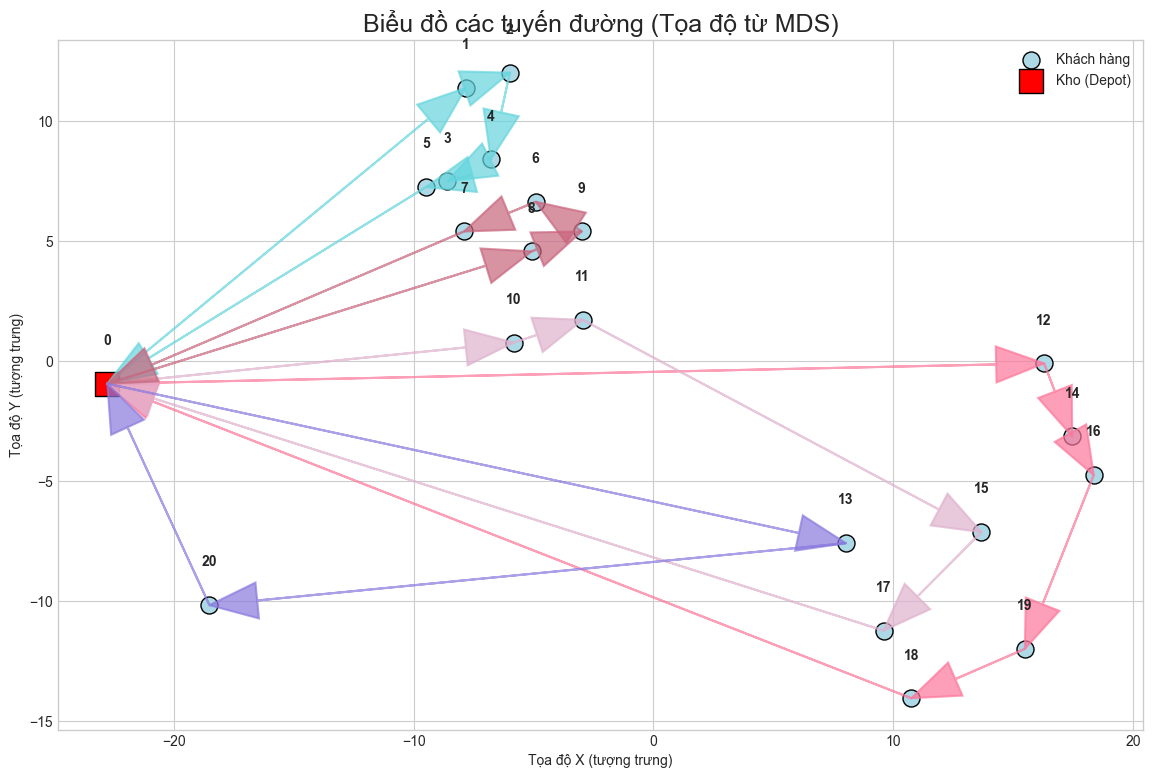

In [527]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import numpy as np
import random

# --- TẠO TỌA ĐỘ TƯỢNG TRƯNG BẰNG MDS ---
# MDS sẽ cố gắng sắp xếp các điểm trên không gian 2D sao cho
# khoảng cách Euclide giữa chúng gần nhất với giá trị trong costMatrix.
print("Đang tạo tọa độ 2D tượng trưng từ costMatrix bằng MDS...")
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress=False)
# Đảm bảo costMatrix là một numpy array
node_coordinates = mds.fit_transform(np.array(costMatrix))
print("Đã tạo xong tọa độ.")

# --- VẼ BIỂU ĐỒ ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 14))

# 1. Vẽ tất cả các điểm khách hàng
# Bỏ qua điểm 0 (kho) để vẽ riêng
customer_coords = node_coordinates[1:]
ax.scatter(customer_coords[:, 0], customer_coords[:, 1], c='lightblue', s=150, label='Khách hàng', edgecolors='black')

# 2. Vẽ điểm kho (depot)
depot_coord = node_coordinates[0]
ax.scatter(depot_coord[0], depot_coord[1], c='red', s=300, marker='s', label='Kho (Depot)', edgecolors='black')

# 3. Ghi nhãn cho các điểm
for i, (x, y) in enumerate(node_coordinates):
    ax.text(x, y + 1.5, str(i), ha='center', va='bottom', fontweight='bold')

# 4. Vẽ các tuyến đường
# 'routes' là biến kết quả từ thuật toán Savings của bạn
for route in routes:
    # Tạo một màu ngẫu nhiên cho mỗi tuyến
    route_color = (random.random(), random.random(), random.random())
    
    # Tạo danh sách các điểm cần đi qua cho tuyến này, bao gồm cả kho
    route_path_indices = [0] + route + [0]
    
    # Lấy tọa độ tương ứng
    route_path_coords = node_coordinates[route_path_indices]
    
    # Vẽ các mũi tên chỉ hướng
    for i in range(len(route_path_coords) - 1):
        start_point = route_path_coords[i]
        end_point = route_path_coords[i+1]
        ax.arrow(start_point[0], start_point[1], 
                 end_point[0] - start_point[0], end_point[1] - start_point[1],
                 head_width=1.5, head_length=2, fc=route_color, ec=route_color, length_includes_head=True,
                 alpha=0.7, lw=1.5)

# --- TÙY CHỈNH BIỂU ĐỒ ---
ax.set_title('Biểu đồ các tuyến đường (Tọa độ từ MDS)', fontsize=18)
ax.set_xlabel('Tọa độ X (tượng trưng)')
ax.set_ylabel('Tọa độ Y (tượng trưng)')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box') # Đảm bảo tỷ lệ x và y bằng nhau

plt.show()

In [528]:
# Giả sử 'routes' là biến chứa kết quả từ thuật toán Savings của bạn
# Ví dụ, sau khi chạy code của bạn, 'routes' có thể trông như thế này:
# routes = [[1, 9, 12, 11, 6], [2, 3, 4, 10], [5, 7, 8]]

def convert_routes_to_vector(routes):
    """
    Chuyển đổi một danh sách các tuyến đường sang dạng biểu diễn vector duy nhất.
    Số 0 được sử dụng làm dấu phân cách giữa các tuyến.
    
    Args:
        routes (list of lists): Danh sách các tuyến đường, ví dụ: [[1, 2], [3, 4]]
        
    Returns:
        list: Một vector duy nhất biểu diễn lời giải, ví dụ: [0, 1, 2, 0, 3, 4, 0]
    """
    solution_vector = [0] # Bắt đầu từ kho
    for route in routes:
        solution_vector.extend(route)
        solution_vector.append(0) # Thêm kho để kết thúc tuyến và bắt đầu tuyến mới
    
    # Loại bỏ số 0 cuối cùng nếu nó không cần thiết 
    # (vì tuyến cuối cùng cũng quay về kho)
    # Tuy nhiên, theo Hình 4.5 của luận văn, vector bao gồm cả số 0 cuối cùng.
    # x = [0 1 2 3 4 0 5 6 7 8 9 0]
    # Vì vậy, chúng ta sẽ giữ lại số 0 cuối cùng.
    # Nếu muốn loại bỏ, bạn có thể thêm: if solution_vector[-1] == 0: solution_vector.pop()
    
    return solution_vector

# --- Sử dụng hàm ---

# 'routes' là biến kết quả từ cell code thuật toán Savings của bạn.
# Chúng ta sẽ sử dụng nó ở đây.
initial_solution_vector = convert_routes_to_vector(routes)

print("Kết quả từ thuật toán Savings (danh sách các tuyến):")
print(routes)
print("\nLời giải đã được chuyển đổi sang dạng vector (Solution Representation):")
print(initial_solution_vector)

# Bạn có thể kiểm tra xem nó có hoạt động với một ví dụ khác không
test_routes = [[1, 9, 12], [2, 3, 4, 10], [5, 7, 8]]
test_vector = convert_routes_to_vector(test_routes)
print("\nVí dụ thử nghiệm:")
print(f"  Input: {test_routes}")
print(f"  Output: {test_vector}")

Kết quả từ thuật toán Savings (danh sách các tuyến):
[[12, 14, 16, 19, 18], [10, 11, 15, 17], [1, 2, 4, 3, 5], [8, 9, 6, 7], [13, 20]]

Lời giải đã được chuyển đổi sang dạng vector (Solution Representation):
[0, 12, 14, 16, 19, 18, 0, 10, 11, 15, 17, 0, 1, 2, 4, 3, 5, 0, 8, 9, 6, 7, 0, 13, 20, 0]

Ví dụ thử nghiệm:
  Input: [[1, 9, 12], [2, 3, 4, 10], [5, 7, 8]]
  Output: [0, 1, 9, 12, 0, 2, 3, 4, 10, 0, 5, 7, 8, 0]


In [529]:
import random

# --- CÁC HÀM PHỤ TRỢ ---
# Hàm này bạn đã có từ bước trước
def convert_routes_to_vector(routes):
    solution_vector = [0]
    for route in routes:
        solution_vector.extend(route)
        solution_vector.append(0)
    return solution_vector

# Hàm này để chuyển đổi ngược lại, rất cần thiết cho việc implement các nước đi
def convert_vector_to_routes(vector):
    """
    Chuyển đổi một vector lời giải về dạng danh sách các tuyến đường.
    """
    routes = []
    current_route = []
    # Bỏ qua số 0 đầu tiên
    for node in vector[1:]:
        if node != 0:
            current_route.append(node)
        else:
            if current_route: # Chỉ thêm nếu tuyến không rỗng
                routes.append(current_route)
            current_route = []
    return routes

# --- IMPLEMENT CÁC "NƯỚC ĐI" (NEIGHBORHOOD MOVES) ---

def general_swap_intra_route(solution_vector, route_idx, i, j):
    """
    Thực hiện nước đi General Swap: Đổi chỗ 2 khách hàng ở vị trí i và j trong cùng 1 tuyến.
    
    Args:
        solution_vector (list): Lời giải hiện tại dạng vector.
        route_idx (int): Chỉ số của tuyến đường cần thay đổi (bắt đầu từ 0).
        i (int): Vị trí của khách hàng thứ nhất trong tuyến.
        j (int): Vị trí của khách hàng thứ hai trong tuyến.
        
    Returns:
        list: Vector lời giải mới (hàng xóm). Trả về None nếu đầu vào không hợp lệ.
    """
    routes = convert_vector_to_routes(solution_vector)
    
    # Kiểm tra tính hợp lệ
    if not (0 <= route_idx < len(routes)):
        print(f"Lỗi: route_idx {route_idx} không hợp lệ.")
        return None
    
    target_route = routes[route_idx]
    if not (0 <= i < len(target_route) and 0 <= j < len(target_route)):
        print(f"Lỗi: Vị trí i={i} hoặc j={j} không hợp lệ cho tuyến có độ dài {len(target_route)}.")
        return None

    # Thực hiện đổi chỗ
    target_route[i], target_route[j] = target_route[j], target_route[i]
    
    return convert_routes_to_vector(routes)


def relocate_intra_route(solution_vector, route_idx, i, j):
    """
    Thực hiện nước đi Relocate (Single Insertion): Di chuyển khách hàng ở vị trí i
    đến vị trí j trong cùng một tuyến.
    
    Args:
        solution_vector (list): Lời giải hiện tại dạng vector.
        route_idx (int): Chỉ số của tuyến đường cần thay đổi.
        i (int): Vị trí của khách hàng cần di chuyển.
        j (int): Vị trí mới để chèn khách hàng vào.
        
    Returns:
        list: Vector lời giải mới (hàng xóm). Trả về None nếu đầu vào không hợp lệ.
    """
    routes = convert_vector_to_routes(solution_vector)
    
    if not (0 <= route_idx < len(routes)):
        print(f"Lỗi: route_idx {route_idx} không hợp lệ.")
        return None
        
    target_route = routes[route_idx]
    if not (0 <= i < len(target_route) and 0 <= j <= len(target_route)):
        print(f"Lỗi: Vị trí i={i} hoặc j={j} không hợp lệ.")
        return None

    # Lấy khách hàng ra khỏi vị trí i và chèn vào vị trí j
    customer_to_move = target_route.pop(i)
    target_route.insert(j, customer_to_move)
    
    return convert_routes_to_vector(routes)


def relocate_inter_route(solution_vector, route_idx_from, route_idx_to, i, j):
    """
    Thực hiện nước đi Relocate (Shift): Di chuyển khách hàng ở vị trí i từ tuyến 'from'
    sang vị trí j ở tuyến 'to'.
    
    Args:
        solution_vector (list): Lời giải hiện tại dạng vector.
        route_idx_from (int): Chỉ số của tuyến nguồn.
        route_idx_to (int): Chỉ số của tuyến đích.
        i (int): Vị trí của khách hàng cần di chuyển trong tuyến nguồn.
        j (int): Vị trí mới để chèn khách hàng vào trong tuyến đích.
        
    Returns:
        list: Vector lời giải mới (hàng xóm). Trả về None nếu đầu vào không hợp lệ.
    """
    routes = convert_vector_to_routes(solution_vector)
    
    if not (0 <= route_idx_from < len(routes) and 0 <= route_idx_to < len(routes)):
        print("Lỗi: Chỉ số tuyến không hợp lệ.")
        return None
        
    route_from = routes[route_idx_from]
    route_to = routes[route_idx_to]

    if len(route_from) <= 1:
        return None
    
    if not (0 <= i < len(route_from) and 0 <= j <= len(route_to)):
        print("Lỗi: Vị trí khách hàng không hợp lệ.")
        return None

    # Di chuyển khách hàng
    customer_to_move = route_from.pop(i)
    route_to.insert(j, customer_to_move)
    
    # Nếu tuyến nguồn trở nên rỗng, hãy xóa nó đi
    if not route_from:
        routes.pop(route_idx_from)
        
    return convert_routes_to_vector(routes)

# # --- SỬ DỤNG VÀ THỬ NGHIỆM ---

# # Giả sử đây là vector lời giải ban đầu từ thuật toán Savings của bạn
# # initial_solution_vector = [0, 1, 9, 12, 11, 6, 0, 2, 3, 4, 10, 0, 5, 7, 8, 0]
# initial_solution_vector = [0, 1, 9, 12, 0, 2, 3, 4, 10, 0, 5, 7, 8, 0]
# print(f"Lời giải ban đầu: \n{initial_solution_vector}\n")

# # 1. Thử nghiệm General Swap (đổi chỗ khách hàng ở vị trí 0 và 2 trong tuyến đầu tiên)
# print("--- 1. Thử nghiệm General Swap (intra-route) ---")
# # Tuyến đầu tiên (chỉ số 0) là [1, 9, 12]. Đổi chỗ khách hàng 1 (vị trí 0) và 12 (vị trí 2)
# new_vector_swap = general_swap_intra_route(initial_solution_vector, route_idx=0, i=0, j=2)
# print(f"Trước khi đổi: {initial_solution_vector}")
# print(f"Sau khi đổi:   {new_vector_swap}\n")


# # 2. Thử nghiệm Relocate (di chuyển khách hàng ở vị trí 0 trong tuyến thứ hai sang vị trí cuối)
# print("--- 2. Thử nghiệm Relocate (intra-route) ---")
# # Tuyến thứ hai (chỉ số 1) là [2, 3, 4, 10]. Di chuyển khách hàng 2 (vị trí 0) ra cuối (vị trí 4)
# new_vector_relocate_intra = relocate_intra_route(initial_solution_vector, route_idx=1, i=0, j=4)
# print(f"Trước khi dời: {initial_solution_vector}")
# print(f"Sau khi dời:   {new_vector_relocate_intra}\n")


# # 3. Thử nghiệm Relocate/Shift (di chuyển khách hàng cuối cùng của tuyến đầu tiên sang đầu tuyến thứ ba)
# print("--- 3. Thử nghiệm Relocate/Shift (inter-route) ---")
# # Tuyến đầu tiên (chỉ số 0) là [1, 9, 12]. Lấy khách hàng 12 (vị trí 2)
# # Chèn vào đầu (vị trí 0) của tuyến thứ ba (chỉ số 2) là [5, 7, 8]
# new_vector_relocate_inter = relocate_inter_route(initial_solution_vector, route_idx_from=0, route_idx_to=2, i=2, j=0)
# print(f"Trước khi dời: {initial_solution_vector}")
# print(f"Sau khi dời:   {new_vector_relocate_inter}\n")

# # Trường hợp đặc biệt: làm rỗng một tuyến đường
# print("--- 4. Thử nghiệm làm rỗng một tuyến ---")
# # Vector có tuyến chỉ gồm 1 khách hàng: [0, 100, 0, 200, 300, 0]
# special_vector = [0, 100, 0, 200, 300, 0]
# # Di chuyển khách hàng 100 từ tuyến đầu tiên (chỉ số 0) sang đầu tuyến thứ hai (chỉ số 1)
# emptied_vector = relocate_inter_route(special_vector, route_idx_from=0, route_idx_to=1, i=0, j=0)
# print(f"Trước khi dời: {special_vector}")
# print(f"Sau khi dời:   {emptied_vector}")

In [530]:
# --- HÀM KIỂM TRA TẢI TRỌNG ---

def check_single_route_feasibility(route, Q):
    """
    Kiểm tra tính hợp lệ về tải trọng cho một tuyến đường DUY NHẤT.
    
    Args:
        route (list): Danh sách các khách hàng trong một tuyến (không bao gồm kho).
        Q (int): Tải trọng của xe.
        
    Returns:
        bool: True nếu tuyến đường hợp lệ, False nếu ngược lại.
    """
    if not route:
        return True # Tuyến rỗng luôn hợp lệ
        
    # 1. Kiểm tra sơ bộ
    total_d = sum(demand[c] for c in route)
    total_p = sum(pickup[c] for c in route)
    
    # Tổng lượng hàng phải giao phải nằm trong xe khi xuất phát
    # Tổng lượng hàng nhận về cuối cùng cũng phải nằm trong xe
    if total_d > Q or total_p > Q:
        return False
        
    # 2. Kiểm tra chi tiết tải trọng tại mỗi điểm
    load = total_d
    for customer in route:
        load = load - demand[customer] + pickup[customer]
        # Tải trọng không được vượt quá capacité tại bất kỳ điểm nào
        if not (0 <= load <= Q):
            return False
            
    return True

def feasibility_check_and_repair(routes, Q):
    """
    Kiểm tra tính hợp lệ của tất cả các tuyến đường trong một lời giải.
    Nếu một tuyến không hợp lệ, thử đảo ngược nó.
    
    Args:
        routes (list of lists): Lời giải dưới dạng danh sách các tuyến đường.
        Q (int): Tải trọng của xe.
        
    Returns:
        (bool, list of lists): Một tuple gồm (True/False, danh sách các tuyến đã được sửa chữa nếu có).
                                 Trả về False nếu có ít nhất một tuyến không hợp lệ kể cả sau khi đảo ngược.
    """
    repaired_routes = []
    for route in routes:
        # Kiểm tra theo chiều xuôi
        if check_single_route_feasibility(route, Q):
            repaired_routes.append(route)
            continue # Tuyến này ổn, chuyển sang tuyến tiếp theo
            
        # Nếu chiều xuôi không hợp lệ, thử đảo ngược
        reversed_route = list(reversed(route))
        if check_single_route_feasibility(reversed_route, Q):
            repaired_routes.append(reversed_route)
            continue # Tuyến đảo ngược ổn, chuyển sang tuyến tiếp theo
        
        # Nếu cả hai chiều đều không hợp lệ
        return (False, None)
        
    return (True, repaired_routes)


# # --- CÁCH SỬ DỤNG VÀ THỬ NGHIỆM ---

# # Ví dụ 1: Một tuyến đường hợp lệ
# route_A = [1, 2] 
# # Total demand = 1200 + 1700 = 2900 <= 6000
# # Load ban đầu = 2900
# # Sau điểm 1: load = 2900 - 1200 (demand) + 0 (pickup) = 1700.  (0 <= 1700 <= 6000 -> OK)
# # Sau điểm 2: load = 1700 - 1700 (demand) + 1200 (pickup) = 1200. (0 <= 1200 <= 6000 -> OK)
# is_feasible_A = check_single_route_feasibility(route_A, capacityOfVehicle)
# print(f"Tuyến A {route_A} có hợp lệ không? -> {is_feasible_A}\n") # Sẽ là True


# # Ví dụ 2: Một tuyến đường không hợp lệ (vượt tải trọng giữa chừng)
# route_B = [8, 9, 10, 11]
# # Total demand = 1900 + 1800 + 1600 + 1700 = 7000 > 6000 -> Không hợp lệ ngay từ đầu
# is_feasible_B = check_single_route_feasibility(route_B, capacityOfVehicle)
# print(f"Tuyến B {route_B} có hợp lệ không? -> {is_feasible_B}\n") # Sẽ là False

# # Ví dụ 3: Một tuyến chỉ hợp lệ khi đảo ngược (Giả định dữ liệu khác)
# demand_special = [0, 10, 40]
# pickup_special = [0, 50, 5]
# Q_special = 50

# route_C_fwd = [1, 2] # Chiều xuôi
# # Total demand = 10 + 40 = 50. Load ban đầu = 50.
# # Sau điểm 1: load = 50 - 10 + 50 = 90. (90 > 50 -> KHÔNG HỢP LỆ)

# route_C_rev = [2, 1] # Chiều ngược
# # Total demand = 40 + 10 = 50. Load ban đầu = 50.
# # Sau điểm 2: load = 50 - 40 + 5 = 15. (0 <= 15 <= 50 -> OK)
# # Sau điểm 1: load = 15 - 10 + 50 = 55. (55 > 50 -> VẪN KHÔNG HỢP LỆ)
# # -> Ví dụ này không hợp lệ cả hai chiều. Nhưng nó minh họa logic kiểm tra.

# # Sử dụng hàm tổng hợp `feasibility_check_and_repair`
# solution_routes = [[1, 2], [5, 6]]
# is_sol_feasible, repaired = feasibility_check_and_repair(solution_routes, capacityOfVehicle)
# print(f"Toàn bộ lời giải {solution_routes} có hợp lệ không? -> {is_sol_feasible}")
# if is_sol_feasible:
#     print(f"Lời giải sau khi có thể đã sửa chữa: {repaired}\n")

# # Ví dụ một lời giải không hợp lệ
# solution_routes_bad = [[1, 2], [8, 9, 10, 11]]
# is_sol_feasible_bad, _ = feasibility_check_and_repair(solution_routes_bad, capacityOfVehicle)
# print(f"Toàn bộ lời giải {solution_routes_bad} có hợp lệ không? -> {is_sol_feasible_bad}")

In [531]:
import time
import math # Để dùng cho math.inf

# --- Đảm bảo các hàm từ các bước trước đã tồn tại ---
# (Bạn chỉ cần chạy các cell trước đó trong notebook)
# - costMatrix, demand, pickup, capacityOfVehicle
# - convert_routes_to_vector, convert_vector_to_routes
# - general_swap_intra_route, relocate_intra_route, relocate_inter_route
# - feasibility_check_and_repair
# - initial_solution_vector (kết quả từ thuật toán Savings)

# --- HÀM TÍNH TỔNG CHI PHÍ ---
def calculate_total_cost(solution_vector):
    """
    Tính tổng chi phí (quãng đường) cho một lời giải dạng vector.
    """
    routes = convert_vector_to_routes(solution_vector)
    total_cost = 0
    for route in routes:
        if not route:
            continue
        # Chi phí từ kho đến điểm đầu tiên
        total_cost += costMatrix[0][route[0]]
        # Chi phí giữa các khách hàng
        for i in range(len(route) - 1):
            total_cost += costMatrix[route[i]][route[i+1]]
        # Chi phí từ điểm cuối cùng về kho
        total_cost += costMatrix[route[-1]][0]
    return total_cost

# --- BỘ KHUNG THUẬT TOÁN VND ---

def variable_neighborhood_descent(initial_vector, max_time_seconds=60):
    """
    Thực hiện thuật toán Variable Neighborhood Descent để cải thiện lời giải ban đầu.
    
    Args:
        initial_vector (list): Lời giải ban đầu dưới dạng vector.
        max_time_seconds (int): Thời gian tối đa cho phép thuật toán chạy.
        
    Returns:
        (list, float): Một tuple chứa (vector lời giải tốt nhất, chi phí tốt nhất).
    """
    start_time = time.time()
    
    # 1. Khởi tạo
    current_vector = initial_vector
    current_cost = calculate_total_cost(current_vector)
    
    best_vector = current_vector
    best_cost = current_cost
    
    print(f"Bắt đầu VND với chi phí ban đầu: {best_cost:.2f}")

    # 2. Danh sách các "kiểu nước đi" (neighborhood structures)
    # Ta sẽ định nghĩa chúng bằng các hàm lambda để tiện lợi
    # Mỗi hàm sẽ trả về một generator để lặp qua tất cả các hàng xóm
    neighborhoods = [
        # a) General Swap (intra-route)
        lambda vec: (
            general_swap_intra_route(vec, r_idx, i, j)
            for r_idx, r in enumerate(convert_vector_to_routes(vec))
            for i in range(len(r))
            for j in range(i + 1, len(r))
        ),
        # b) Relocate (intra-route)
        lambda vec: (
            relocate_intra_route(vec, r_idx, i, j)
            for r_idx, r in enumerate(convert_vector_to_routes(vec))
            for i in range(len(r))
            for j in range(len(r) + 1) if i != j and i != j-1 # tránh nước đi vô nghĩa
        ),
        # c) Relocate (inter-route)
        lambda vec: (
            relocate_inter_route(vec, r_from_idx, r_to_idx, i, j)
            for r_from_idx, r_from in enumerate(convert_vector_to_routes(vec))
            for r_to_idx, r_to in enumerate(convert_vector_to_routes(vec))
            if r_from_idx != r_to_idx
            for i in range(len(r_from))
            for j in range(len(r_to) + 1)
        )
    ]
    
    k = 0 # Chỉ số của neighborhood hiện tại
    while k < len(neighborhoods) and (time.time() - start_time) < max_time_seconds:
        improvement_found = False
        
        # 3. Khám phá toàn bộ hàng xóm của kiểu nước đi thứ k
        # Dùng generator để tiết kiệm bộ nhớ
        neighbor_generator = neighborhoods[k](current_vector)
        
        for neighbor_vector in neighbor_generator:
            if (time.time() - start_time) > max_time_seconds:
                print("Hết thời gian!")
                break
            
            # Bỏ qua các nước đi không hợp lệ mà các hàm move trả về None
            if neighbor_vector is None:
                continue
                
            # 4. Kiểm tra tính hợp lệ của hàng xóm
            neighbor_routes = convert_vector_to_routes(neighbor_vector)
            is_feasible, repaired_routes = feasibility_check_and_repair(neighbor_routes, capacityOfVehicle)
            
            if is_feasible:
                # Nếu hợp lệ, tính chi phí
                neighbor_cost = calculate_total_cost(convert_routes_to_vector(repaired_routes))
                
                # 5. So sánh và cập nhật (First Improvement)
                if neighbor_cost < current_cost:
                    current_vector = convert_routes_to_vector(repaired_routes)
                    current_cost = neighbor_cost
                    
                    print(f"  -> Cải thiện! Chi phí mới: {current_cost:.2f} (dùng nước đi loại {k})")
                    
                    # Cập nhật lời giải tốt nhất toàn cục nếu cần
                    if current_cost < best_cost:
                        best_vector = current_vector
                        best_cost = current_cost
                    
                    improvement_found = True
                    break # Thoát khỏi vòng lặp for, quay lại k=0
        
        # 6. Chuyển đổi neighborhood
        if improvement_found:
            k = 0 # Quay lại neighborhood đầu tiên
        else:
            print(f"Không tìm thấy cải thiện nào với nước đi loại {k}. Chuyển sang nước đi tiếp theo.")
            k += 1 # Chuyển sang neighborhood tiếp theo
            
    end_time = time.time()
    print("\n--- Kết thúc VND ---")
    print(f"Thuật toán kết thúc sau {end_time - start_time:.2f} giây.")
    print(f"Chi phí ban đầu: {calculate_total_cost(initial_vector):.2f}")
    print(f"Chi phí tốt nhất tìm được: {best_cost:.2f}")
    
    return best_vector, best_cost

# --- CHẠY THUẬT TOÁN ---

# Đảm bảo 'initial_solution_vector' đã được tạo từ Bước 1
# initial_solution_vector = convert_routes_to_vector(routes)

# Chạy VND để cải thiện lời giải
final_vector, final_cost = variable_neighborhood_descent(initial_solution_vector, max_time_seconds=60)

# In kết quả cuối cùng
print("\n--- Lời giải cuối cùng sau khi cải tiến bằng VND ---")
final_routes = convert_vector_to_routes(final_vector)
total_dist = 0.0
for idx, r in enumerate(final_routes, 1):
    d = route_distance(r) # Dùng lại hàm từ code Savings
    total_dist += d
    print(f" Route {idx}: {[0] + r + [0]} | Distance = {d:.1f}")

print(f"\nTổng chi phí cuối cùng: {total_dist:.1f}")

Bắt đầu VND với chi phí ban đầu: 327.00
Không tìm thấy cải thiện nào với nước đi loại 0. Chuyển sang nước đi tiếp theo.
Không tìm thấy cải thiện nào với nước đi loại 1. Chuyển sang nước đi tiếp theo.
Không tìm thấy cải thiện nào với nước đi loại 2. Chuyển sang nước đi tiếp theo.

--- Kết thúc VND ---
Thuật toán kết thúc sau 0.04 giây.
Chi phí ban đầu: 327.00
Chi phí tốt nhất tìm được: 327.00

--- Lời giải cuối cùng sau khi cải tiến bằng VND ---
 Route 1: [0, 12, 14, 16, 19, 18, 0] | Distance = 93.0
 Route 2: [0, 10, 11, 15, 17, 0] | Distance = 79.0
 Route 3: [0, 1, 2, 4, 3, 5, 0] | Distance = 44.0
 Route 4: [0, 8, 9, 6, 7, 0] | Distance = 43.0
 Route 5: [0, 13, 20, 0] | Distance = 68.0

Tổng chi phí cuối cùng: 327.0


Đang tạo tọa độ 2D tượng trưng từ costMatrix bằng MDS...


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Đã tạo xong tọa độ.


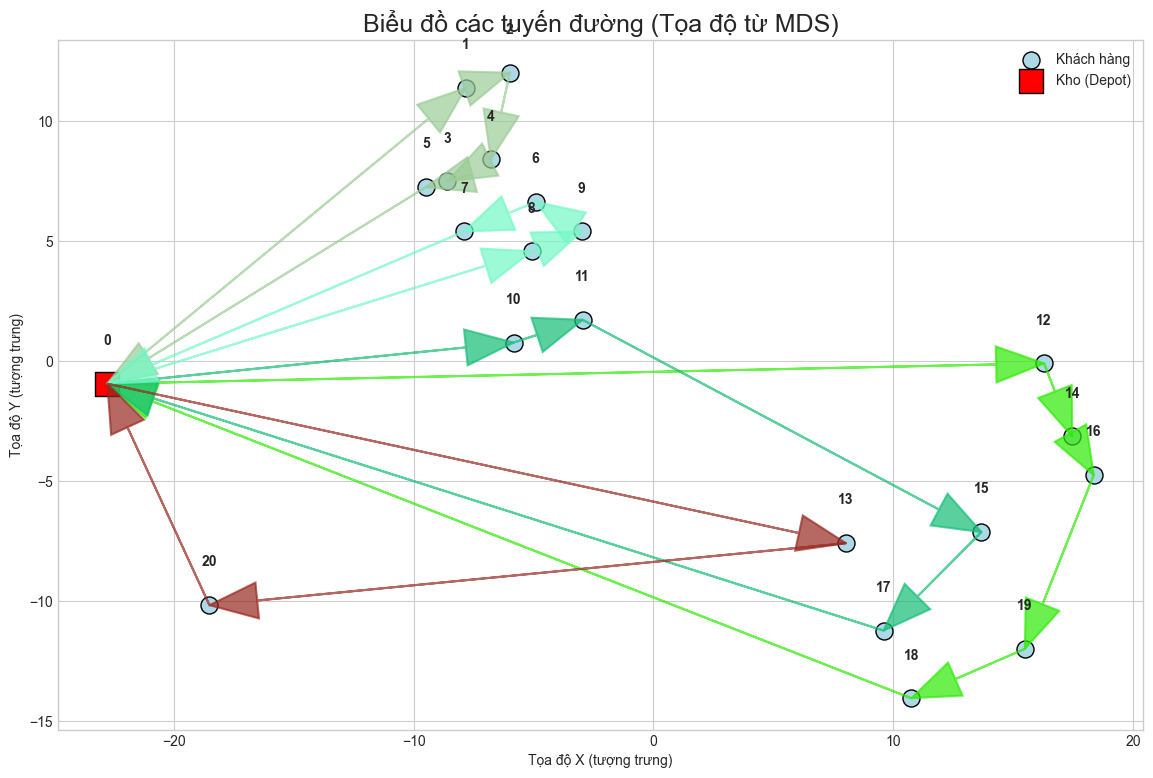

In [532]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import numpy as np
import random

# --- TẠO TỌA ĐỘ TƯỢNG TRƯNG BẰNG MDS ---
# MDS sẽ cố gắng sắp xếp các điểm trên không gian 2D sao cho
# khoảng cách Euclide giữa chúng gần nhất với giá trị trong costMatrix.
print("Đang tạo tọa độ 2D tượng trưng từ costMatrix bằng MDS...")
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress=False)
# Đảm bảo costMatrix là một numpy array
node_coordinates = mds.fit_transform(np.array(costMatrix))
print("Đã tạo xong tọa độ.")

# --- VẼ BIỂU ĐỒ ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 14))

# 1. Vẽ tất cả các điểm khách hàng
# Bỏ qua điểm 0 (kho) để vẽ riêng
customer_coords = node_coordinates[1:]
ax.scatter(customer_coords[:, 0], customer_coords[:, 1], c='lightblue', s=150, label='Khách hàng', edgecolors='black')

# 2. Vẽ điểm kho (depot)
depot_coord = node_coordinates[0]
ax.scatter(depot_coord[0], depot_coord[1], c='red', s=300, marker='s', label='Kho (Depot)', edgecolors='black')

# 3. Ghi nhãn cho các điểm
for i, (x, y) in enumerate(node_coordinates):
    ax.text(x, y + 1.5, str(i), ha='center', va='bottom', fontweight='bold')

# 4. Vẽ các tuyến đường
# 'routes' là biến kết quả từ thuật toán Savings của bạn
for route in routes:
    # Tạo một màu ngẫu nhiên cho mỗi tuyến
    route_color = (random.random(), random.random(), random.random())
    
    # Tạo danh sách các điểm cần đi qua cho tuyến này, bao gồm cả kho
    route_path_indices = [0] + route + [0]
    
    # Lấy tọa độ tương ứng
    route_path_coords = node_coordinates[route_path_indices]
    
    # Vẽ các mũi tên chỉ hướng
    for i in range(len(route_path_coords) - 1):
        start_point = route_path_coords[i]
        end_point = route_path_coords[i+1]
        ax.arrow(start_point[0], start_point[1], 
                 end_point[0] - start_point[0], end_point[1] - start_point[1],
                 head_width=1.5, head_length=2, fc=route_color, ec=route_color, length_includes_head=True,
                 alpha=0.7, lw=1.5)

# --- TÙY CHỈNH BIỂU ĐỒ ---
ax.set_title('Biểu đồ các tuyến đường (Tọa độ từ MDS)', fontsize=18)
ax.set_xlabel('Tọa độ X (tượng trưng)')
ax.set_ylabel('Tọa độ Y (tượng trưng)')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box') # Đảm bảo tỷ lệ x và y bằng nhau

plt.show()